# Part C
- This part requires you to do only coding.
- Please remember that this should all be your own work
- You need to submit the whole notebook

Import standard modules:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Import section specific modules:

In [ ]:
!pip install opencv-contrib-python

In [ ]:
import cv2
import matplotlib.image as mpimg

In [ ]:
def scale(x):
  # Scale between 0 and 255
  return (x / np.max(x)) * 255

def log_scale(x):
  # Log scale between 0 and 255
  log_abs = np.log(np.abs(x) + 1)
  return scale(log_abs)

In [ ]:
elephant = cv2.imread("/content/Elephant.png")
# OpenCV reads images in BGR (Blue, Green, Red) color format, so convert to RGB
elephant = cv2.cvtColor(elephant, cv2.COLOR_BGR2RGB)

rows, cols, bands = elephant.shape

### 1. Construct a filled triangle sampling function and plot the function.  This can be any triangle as long as there are three sides to it. (12 marks)

- The triangle that you generate should be in matrix format
- You should plot the generated sampling triangle function to show that you managed to generate a triangle sampling function.
- An example output of a triangle:



![image.png](attachment:image.png)

In [ ]:
"""Write your code for the triangle sampling function here"""
def generate_triangle_mask(rows, cols, base_width, triangle_height):
    # Create a matrix of zeros with the specified size
    mask = np.zeros((rows, cols), dtype=np.uint8)

    r_mid = rows // 2
    c_mid = cols // 2
    bw_mid = base_width // 2
    th_mid = triangle_height // 2

    # Calculate the coordinates of the triangle vertices
    x1 = c_mid - bw_mid
    y1 = r_mid + th_mid
    x2 = c_mid + bw_mid
    y2 = r_mid + th_mid
    x3 = c_mid
    y3 = r_mid - th_mid

    # Define the triangle vertices
    vertices = np.array([[x1, y1], [x2, y2], [x3, y3]], np.int32)
    vertices = vertices.reshape((-1, 1, 2))

    # Fill the triangle with ones
    cv2.fillPoly(mask, [vertices], 1)

    return mask

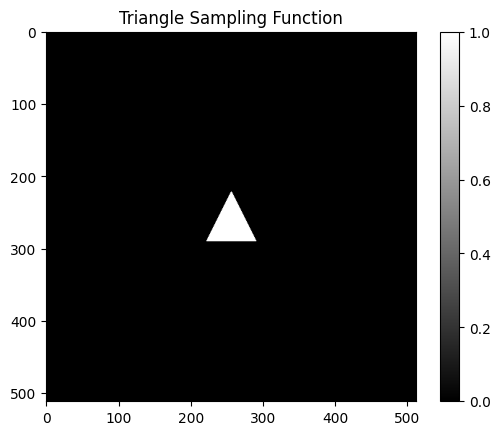

In [ ]:
"""Code to plot your triangle function here"""
M = generate_triangle_mask(rows, cols, 69, 69)
plt.imshow(M, cmap="gray")
plt.title('Triangle Sampling Function')
plt.colorbar()
plt.show()

### 2. Compute the PSF of the triangle sampling function, and also plot this PSF. (4 marks)



In [ ]:
"""Code to compute the PSF here"""
psf = np.fft.fftn(M)

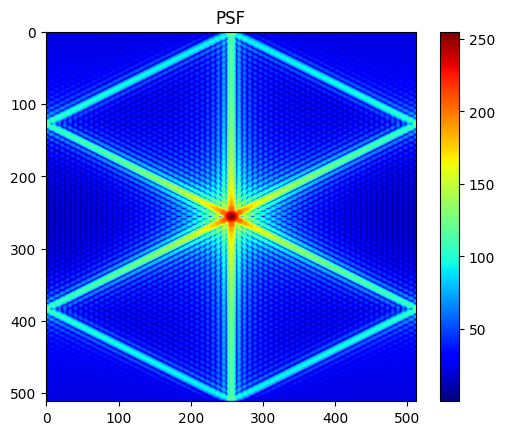

In [ ]:
"""Code for plotting the PSF here"""
psf_shifted = np.fft.fftshift(psf)
plt.imshow(log_scale(psf_shifted), cmap="jet")
plt.title('PSF')
plt.colorbar()
plt.show()

### 3. Convolve this PSF with the given Elephant image to produce the Observed Image, and plot. (4 marks)
![Elephant.png](attachment:Elephant.png)

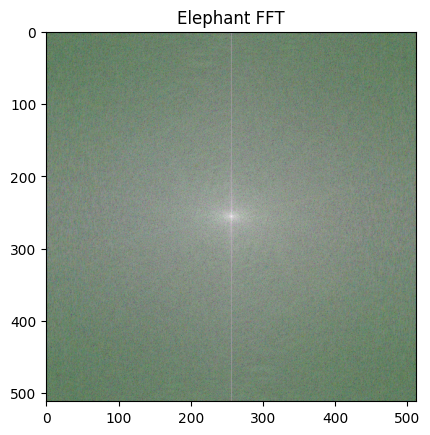

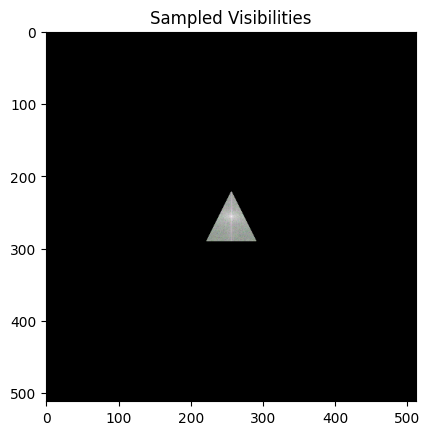

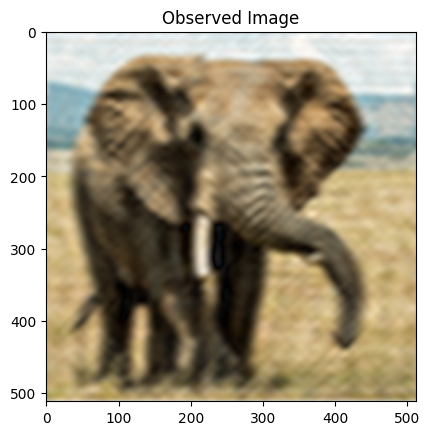

In [ ]:
"""Code for convolving the PSF with the Elephant Image here"""

# FFT of elephant
elephant_fft = np.fft.fftshift(np.fft.fftn(elephant))
# Log scale each of the bands for better visualisation
elephant_fft_scaled = np.zeros(elephant.shape)
for band in range(elephant_fft.shape[-1]):
  elephant_fft_scaled[:, :, band] = log_scale(elephant_fft[:, :, band])
# Plot FFT of elephant
plt.imshow(elephant_fft_scaled.astype(np.uint8))
plt.title('Elephant FFT')
plt.show()

# Apply the triangular mask to the FFT of the elephant
sampled_visibilities = M[:, :, np.newaxis] * elephant_fft
# Log scale each of the bands for better visualisation
sampled_visibilities_scaled = np.zeros(sampled_visibilities.shape)
for band in range(sampled_visibilities.shape[-1]):
  sampled_visibilities_scaled[:, :, band] = log_scale(sampled_visibilities[:, :, band])
# Plot sampled visibilities
plt.imshow(sampled_visibilities_scaled.astype(np.uint8))
plt.title('Sampled Visibilities')
plt.show()

# Observed image is the ifft of sampled visibilities
obs_img = np.abs(np.fft.ifftn(sampled_visibilities))
# Scale each of the bands between 0 and 255 for better visualisation
for band in range(obs_img.shape[-1]):
  obs_img[:, :, band] = scale(obs_img[:, :, band])
# Plot observed image
plt.imshow(obs_img.astype(np.uint8))
plt.title('Observed Image')
plt.show()